# 파이썬으로 CSV 파일 읽기


*   pandas의 read_csv를 활용해 csv 파일을 데이터 프레임으로 불러오겠습니다.
* SBP: 수축기혈압, DBP: 이완기혈압, BMI: 체질량지수, HCVD(심혈관질환 발생가능성 높음- 1/ 낮음- 0)



In [46]:
# pandas 라이브러리를 불러옵니다.
import pandas as pd

# 데이터셋을 로드합니다.
dataset = pd.read_csv('심혈관질환.csv')
dataset.head()

,SBP,DBP,BMI,HCVD
0,116,78,16.6,0
1,100,60,22.3,0
2,100,60,21.9,0
3,111,70,20.2,0
4,120,80,20.0,0


# 산점도를 그려 데이터 확인하기


* 데이터 시각화를 위해 필요한 특성을 추출합니다.

In [47]:
# 'SBP', 'DBP', 'BMI'등의 특성을 변수로 저장합니다.
SBP = dataset['SBP']
DBP = dataset['DBP']
BMI = dataset['BMI']

* 산점도 그리기를 통해 특성 간의 관계를 시각화합니다.

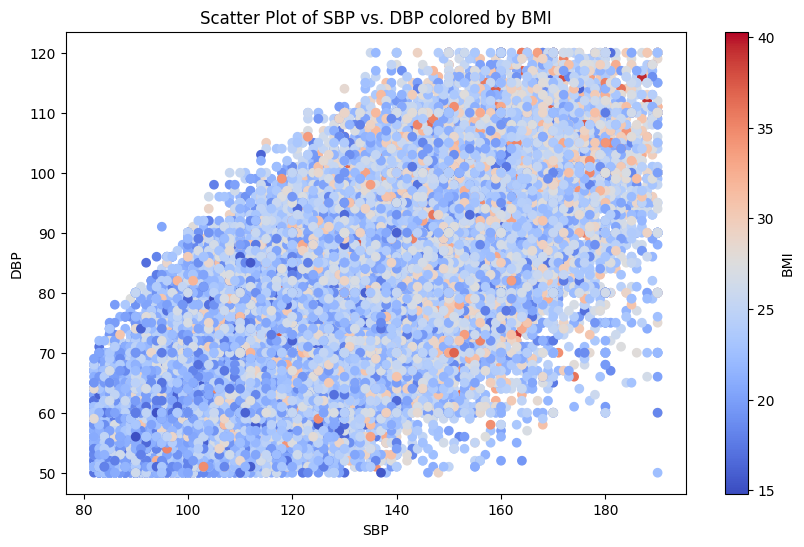

In [48]:
# 'matplotlib.pyplot' 라이브러리를 사용하여 산점도를 그립니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# 'plt.scatter' 함수를 사용하여 'SBP'와 'DBP'를 x축과 y축으로 설정하고, 'BMI'를 색상으로 표시합니다.
plt.scatter(SBP, DBP, c=BMI, cmap='coolwarm')
# 'plt.colorbar'를 사용하여 색상 척도를 추가합니다.
plt.colorbar(label='BMI')
# 다양한 그래프 설정을 위해 'plt.xlabel', 'plt.ylabel', 'plt.title' 등을 사용합니다.
plt.xlabel('SBP')
plt.ylabel('DBP')
plt.title('Scatter Plot of SBP vs. DBP colored by BMI')
# 'plt.show'를 사용하여 그래프를 출력합니다.
plt.show()

# 특성과 레이블 분리하기
* SBP, DBP, BMI를 특성으로 지정하고 HCVD를 레이블로 지정합니다.

In [49]:
X = dataset[['SBP', 'DBP', 'BMI']]
y = dataset['HCVD']

# 데이터 전처리
* 훈련 세트와 테스트 세트로 데이터를 나누기 전에 전처리 수행합니다.

In [50]:
# 'StandardScaler'를 사용하여 데이터를 표준화합니다.
from sklearn.model_selection import train_test_split
# 'sklearn.preprocessing' 모듈에서 'StandardScaler'를 불러옵니다.
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 데이터를 표준화하기 위해 'StandardScaler' 객체를 생성합니다.
scaler = StandardScaler()

# 'transform' 메소드를 사용하여 훈련 세트와 테스트세트의 특성을 같은 기준으로 표준화합니다.
X = scaler.fit_transform(X)

# 훈련 세트와 테스트 세트로 나누기
* 전체 데이터 중 20%를 테스트 세트로 지정합니다.

In [51]:
# 'train_test_split' 함수를 사용하여 훈련 세트와 테스트 세트로 나눕니다.
# 'X_train', 'X_test', 'y_train', 'y_test' 변수에 각각의 데이터를 저장합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 알고리즘을 이용하여 데이터 분류하기
* k-NN 분류기를 초기화하고 훈련합니다.


In [52]:
# 'KNeighborsClassifier'를 사용하여 k-NN 분류기 객체를 초기화합니다.
knn = KNeighborsClassifier()
# 'fit' 메소드를 사용하여 분류기를 훈련 세트에 맞춥니다.
knn.fit(X_train, y_train)

KNeighborsClassifier()

* 훈련 세트와 테스트 세트의 정확도를 평가합니다.

In [53]:
# 'score' 메소드를 사용하여 훈련 세트의 정확도를 계산하고 출력합니다.
accuracy_train = knn.score(X_train, y_train)
print('분류 모델의 훈련 세트 정확도:', accuracy_train)

# 'score' 메소드를 사용하여 테스트 세트의 정확도를 계산하고 출력합니다.
accuracy_test = knn.score(X_test, y_test)
print('분류 모델의 테스트 세트 정확도:', accuracy_test)

분류 모델의 훈련 세트 정확도: 0.9996875
분류 모델의 테스트 세트 정확도: 0.99925


두 정확도의 오차가 크지 않은 걸 보니, 일반화가 잘된 모델이라고 할 수 있습니다.

# 하지만...
저희는 이전 지도학습 코드에서 낮은 정확도를 보였습니다. 그런 뼈아픈 경험이 있다 보니, 이 모델도 정말 잘 학습된 모델일까? 하는 의심이 들었습니다. 따라서 추가적으로 모델의 성능을 평가하기 위해 'K-Fold 교차 검증'을 사용했습니다.

# K-Fold 교차 검증 수행하기

[K-Fold 교차검증 설명](https://bbdata.tistory.com/10)

In [54]:
# 'cross_val_score' 함수를 사용하여 K-Fold 교차 검증을 수행합니다.
from sklearn.model_selection import cross_val_score

# 'cv' 매개변수를 통해 폴드 수를 5로 설정합니다.
scores = cross_val_score(knn, X, y, cv=5)

In [55]:
# 각 폴드의 정확도를 계산하고 출력합니다.
for i, score in enumerate(scores):
    print(f'폴드 {i+1}의 정확도: {score}')

폴드 1의 정확도: 0.99936
폴드 2의 정확도: 0.999225
폴드 3의 정확도: 0.999315
폴드 4의 정확도: 0.99935
폴드 5의 정확도: 0.999035


In [56]:
# 마지막으로 평균 정확도를 계산하여 출력합니다.
mean_accuracy = scores.mean()
print('평균 정확도:', mean_accuracy)

평균 정확도: 0.9992570000000001


K-Fold 교차 검증에서 얻은 평균 정확도는 데이터에 대한 불규칙성을 더 잘 반영하며, 모델의 성능을 보다 신뢰할 수 있도록 합니다. 그런데 평균 정확도 역시 99.9%가 나오다니! 정말 학습이 잘된 모델인 것 같네요.

# 또 다른 방법은 없을까?
하지만 저희는 끝없는 의심을 합니다. 이게 정말 좋은 모델일까? 그래서 찾은 마지막. 정밀도(예측한 것중에 정답의 비율은?), 재현율(찾아야 할 것중에 실제로 찾은 비율은?), F1 Score(정밀도와 재현율의 조화 평균)을 통해 알아보는 것입니다.

# [정밀도, 재현율, F1 점수 계산하기](https://bhcboy100.medium.com/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%B6%84%EB%A5%98-%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%A0%95%ED%99%95%EB%8F%84-%EC%A0%95%EB%B0%80%EB%8F%84-%EC%9E%AC%ED%98%84%EC%9C%A8-f1-%EC%8A%A4%EC%BD%94%EC%96%B4-6bf91535a01a)

In [57]:
# 'precision_score', 'recall_score', 'f1_score' 함수를 사용하여 각각의 값을 계산합니다.
from sklearn.metrics import precision_score, recall_score, f1_score

# 테스트 세트에 대한 예측 결과를 얻습니다.
y_pred = knn.predict(X_test)

# 정밀도를 계산합니다.
precision = precision_score(y_test, y_pred)
print('정밀도:', precision)

# 재현율을 계산합니다.
recall = recall_score(y_test, y_pred)
print('재현율:', recall)

# F1 점수를 계산합니다.
f1 = f1_score(y_test, y_pred)
print('F1 점수:', f1)

정밀도: 0.9951842432768789
재현율: 0.9966943044491411
F1 점수: 0.9959387014674826


정밀도, 재현율, F1 점수가 매우 높은 값을 갖는 걸 보니 이 모델은 클래스를 정확하게 분류하고 있는 걸 알 수 있습니다! 그럼 실제 값을 넣어 볼까요?

# 새로운 데이터의 위치 확인해 보기
아래 10개의 새로운 데이터 위치를 산점도를 그려 확인해 보겠습니다.

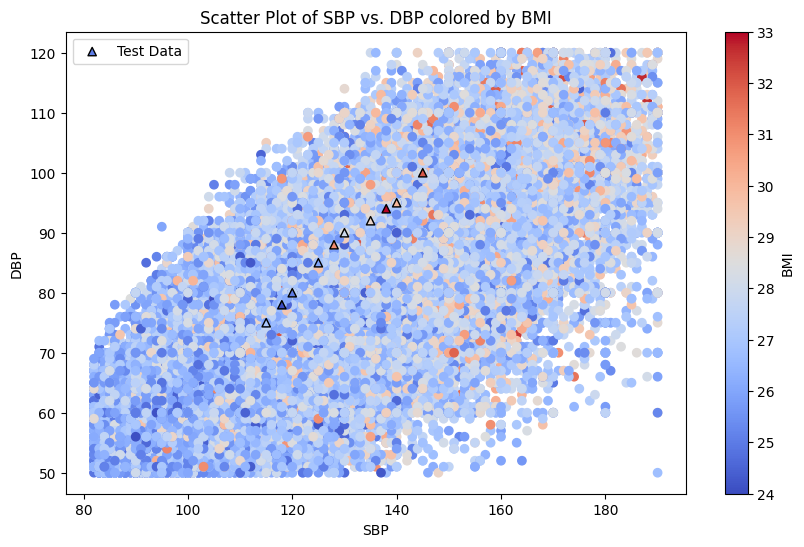

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋을 로드합니다.
dataset = pd.read_csv('심혈관질환.csv')

# 특성과 레이블을 분리합니다.
# SBP, DBP, BMI를 특성으로 지정합니다.
X = dataset[['SBP', 'DBP', 'BMI']]

# 테스트 데이터
test_data = [[120, 80, 25],    
             [130, 90, 28],    
             [140, 95, 30],    
             [115, 75, 27],   
             [145, 100, 32],  
             [125, 85, 26],    
             [135, 92, 29],    
             [128, 88, 31],    
             [138, 94, 33],    
             [118, 78, 24]]

# 'matplotlib.pyplot' 라이브러리를 사용하여 산점도를 그립니다.
plt.figure(figsize=(10, 6))
# 'plt.scatter' 함수를 사용하여 'SBP'와 'DBP'를 x축과 y축으로 설정합니다.
# 'BMI'를 색상으로 표시하며, 'c' 매개변수에 'BMI' 값을 전달합니다.
# 'cmap' 매개변수를 사용하여 색상 맵을 지정합니다.
plt.scatter(X['SBP'], X['DBP'], c=X['BMI'], cmap='coolwarm')
# 추가된 코드: 테스트 데이터를 삼각형으로 표시합니다.
# 각 테스트 데이터의 'BMI' 값을 'c' 매개변수에 전달하여 색상을 다르게 표현합니다.
plt.scatter([data[0] for data in test_data], [data[1] for data in test_data], marker='^', edgecolor='black', linewidth=1, c=[data[2] for data in test_data], cmap='coolwarm', label='Test Data')
# 'plt.colorbar'를 사용하여 색상 척도를 추가합니다.
plt.colorbar(label='BMI')
# 다양한 그래프 설정을 위해 'plt.xlabel', 'plt.ylabel', 'plt.title' 등을 사용합니다.
plt.xlabel('SBP')
plt.ylabel('DBP')
plt.title('Scatter Plot of SBP vs. DBP colored by BMI')
# 범례 표시
plt.legend()
# 'plt.show'를 사용하여 그래프를 출력합니다.
plt.show()


# 테스트 데이터에 대한 예측 수행하기
* 산점도에 나타낸 데이터를 예측해 보겠습니다.

In [60]:
# 예측을 수행할 테스트 데이터를 생성합니다.
test_data = [[120, 80, 25],    # 첫 번째 테스트 데이터
             [130, 90, 28],    # 두 번째 테스트 데이터
             [140, 95, 30],    # 세 번째 테스트 데이터
             [115, 75, 27],    # 네 번째 테스트 데이터
             [145, 100, 32],   # 다섯 번째 테스트 데이터
             [125, 85, 26],    # 여섯 번째 테스트 데이터
             [135, 92, 29],    # 일곱 번째 테스트 데이터
             [128, 88, 31],    # 여덟 번째 테스트 데이터
             [138, 94, 33],    # 아홉 번째 테스트 데이터
             [118, 78, 24]]    # 열 번째 테스트 데이터

# 테스트 데이터에 대한 전처리 - 표준점수 (Z-score) 적용
test_data = pd.DataFrame(test_data, columns=['SBP', 'DBP', 'BMI'])
test_data = scaler.transform(test_data)

# 'predict' 메소드를 사용하여 테스트 데이터에 대한 예측을 수행합니다.
predictions = knn.predict(test_data)

# 예측 결과를 출력합니다.
for i, prediction in enumerate(predictions):
    print(f'{i+1}번째 테스트 데이터의 예상값: {prediction}')


1번째 테스트 데이터의 예상값: 0
2번째 테스트 데이터의 예상값: 0
3번째 테스트 데이터의 예상값: 1
4번째 테스트 데이터의 예상값: 0
5번째 테스트 데이터의 예상값: 1
6번째 테스트 데이터의 예상값: 0
7번째 테스트 데이터의 예상값: 1
8번째 테스트 데이터의 예상값: 0
9번째 테스트 데이터의 예상값: 1
10번째 테스트 데이터의 예상값: 0
